In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/mnist1')
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

https://pytorch.org/docs/stable/tensorboard.html

In [4]:
class simple_CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(simple_CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        return x

In [5]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())


In [7]:
# Hyperparameters
lr = 0.001
in_channels = 1
num_classes = 10
batch_size = 64
num_epochs = 1


# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model = simple_CNN(in_channels=in_channels, num_classes=num_classes).to(device)

#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [32]:
import keyword
import torch
writer = SummaryWriter('runs/example1')
meta = []
while len(meta)<100:
    meta = meta+keyword.kwlist # get some strings
meta = meta[:100]

for i, v in enumerate(meta):
    meta[i] = v+str(i)

label_img = torch.rand(100, 3, 32, 32)
for i in range(100):
    label_img[i]*=i/100.0

writer.add_embedding(torch.randn(100, 5), metadata=meta, label_img=label_img)
writer.add_embedding(torch.randn(100, 5), label_img=label_img)
writer.add_embedding(torch.randn(100, 5), metadata=meta)
writer.close()

#https://tensorboardx.readthedocs.io/en/latest/tensorboard.html

### Agregando imagenes

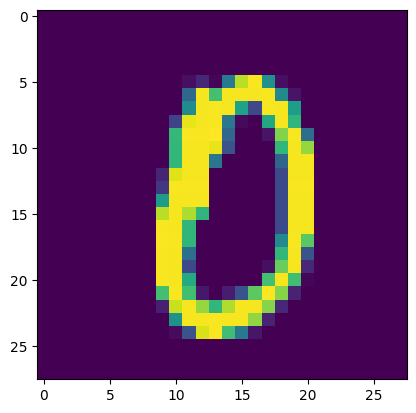

In [54]:
examples = iter(test_loader)
example_data, example_targets = next(examples)
#print(example_data)
plt.imshow(example_data[55][0])

#for i in range(6):
 #  plt.subplot(2,3,i+1)
  #  plt.imshow(example_data[i][0], cmap='gray')
#plt.show()


############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.add_image('iwi',example_data[56])
writer.close()


In [105]:
step=0
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # forward
        scores = model(data)
        loss = criterion(scores, targets)
        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()
        
        #Calculate running training accuracy
        _, predictions = scores.max(1) # [[0,1],[1,0],[0,1],[]]
               
        num_correct = (predictions == targets).sum() #TP+TN
        running_train_acc = float(num_correct)/float(data.shape[0]) #ACC

        # tensorboard
        writer.add_scalar('Training loss2', loss, global_step = step)
        writer.add_scalar('Training Accurcy2', running_train_acc, global_step = step)
        
        step += 1 #step is the number of batches
        

Exception ignored in: <function tqdm.__del__ at 0x0000014B2E651620>
Traceback (most recent call last):
  File "c:\Users\Fernando Celis\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "c:\Users\Fernando Celis\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


KeyboardInterrupt: 

` add_scalars(main_tag, tag_scalar_dict, global_step=None, walltime=None)`  

Cuando ejecutas el método add_scalars varias veces con el mismo main_tag en diferentes ejecuciones, las gráficas se combinarán en TensorBoard, ya que TensorBoard mostrará todos los escalares con la misma etiqueta principal en una misma gráfica. Para corregir cambiaremos el tag o iniciar otro `writer = SummaryWriter('runs/mnist2') ` donde runs/mnist2 puede ser otra ruta.

In [107]:
# Hyperparameters
in_channels = 1
num_classes = 10
num_epochs = 3
batch_sizes = [64,128,1024]
learning_rates = [0.01, 0.001, 0.0001]


# Load Data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),  download=True)

for batch_size in batch_sizes:
    for lr in learning_rates:
        step = 0        
        
        #dataloader
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
        
        #Initialize network
        model = simple_CNN(in_channels=in_channels, num_classes=num_classes)
        model.to(device) #move model to device

        
        #Loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        #TENSORBOARD WRITER 
        writer = SummaryWriter(f'runs/MNIST/batchSize_{batch_size}_lr_{lr}')    
        
        for epoch in range(num_epochs):
            for batch_idx, (data, targets) in enumerate(train_loader):
                # Get data to cuda if possible
                data = data.to(device=device)
                targets = targets.to(device=device)

                # forward
                scores = model(data)
                loss = criterion(scores, targets)

                # backward
                optimizer.zero_grad()
                loss.backward()

                # gradient descent or adam step
                optimizer.step()
                
                #Calculate running trining accuracy
                _, predictions = scores.max(1)
                num_correct = (predictions == targets).sum()
                running_train_acc = float(num_correct)/float(data.shape[0])

                # tensorboard
                writer.add_scalar('Training loss', loss, global_step = step)
                writer.add_scalar('Training Accurcy', running_train_acc, global_step = step)
                step += 1 #step is the number of batches
                
        writer.add_hparams(
            hparam_dict = {"lr": lr, "bsize": batch_size},
            metric_dict = {"Accuracy": sum(accuracies)/len(accuracies), "loss": sum(losses)}
        )

KeyboardInterrupt: 

` writer.add_hparams` agregar hyperparametros

`writer.add_histogram ` Histogramas

In [127]:
# Hyperparameters
in_channels = 1
num_classes = 10
num_epochs = 1
batch_sizes = [128,1024]
learning_rates = [0.01, 0.001, 0.0001]


# Load Data
#train_dataset = datasets.MNIST(root='dataset/', train=True, transform = transforms.ToTensor(), download=True)
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),  download=True)

for batch_size in batch_sizes:
    for lr in learning_rates:
        step = 0        
        
        #dataloader
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
        
        #Initialize network
        model = simple_CNN(in_channels=in_channels, num_classes=num_classes)
        model.to(device) #move model to device
        
        #Loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        #TENSORBOARD WRITER 
        writer = SummaryWriter(f'runs/MNIST/batchSize_{batch_size}_lr_{lr}')    
        
        for epoch in range(num_epochs):
            accuracies, losses = [], []
            for batch_idx, (data, targets) in enumerate(train_loader):
                # Get data to cuda if possible
                data = data.to(device=device)
                targets = targets.to(device=device)
                
                img_grid = torchvision.utils.make_grid(data) #make grid of images
                writer.add_image("mnist_images", img_grid)
                # forward
                scores = model(data)
                loss = criterion(scores, targets)
                losses.append(loss.item())
                
                # backward
                optimizer.zero_grad()
                loss.backward()

                # gradient descent or adam step
                optimizer.step()


                # histogram of weights
                writer.add_histogram("fc1", model.fc1.weight, global_step = step)
                writer.add_histogram("conv1", model.conv1.weight, global_step = step)
                writer.add_histogram("conv2", model.conv2.weight, global_step = step)
                
                #Calculate running trining accuracy
                _, predictions = scores.max(1)
                num_correct = (predictions == targets).sum()
                running_train_acc = float(num_correct)/float(data.shape[0])
                accuracies.append(running_train_acc)
                # tensorboard
                writer.add_scalar('Training loss', loss, global_step = step)
                writer.add_scalar('Training Accurcy', running_train_acc, global_step = step)
                step += 1 #step is the number of batches

        writer.add_hparams(
            hparam_dict = {"lr": lr, "bsize": batch_size},
            metric_dict = {"Accuracy": sum(accuracies)/len(accuracies), "loss": sum(losses)}
        )

KeyboardInterrupt: 

In [133]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 1

learning_rate = 0.001


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))
###################################################

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################



Epoch [1/1], Step [100/469], Loss: 0.3626
Epoch [1/1], Step [200/469], Loss: 0.3480
Epoch [1/1], Step [300/469], Loss: 0.2180
Epoch [1/1], Step [400/469], Loss: 0.1185
